In [16]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [118]:
#import libraries
import pandas as pd
import numpy as np
import csv
import ast
import re
from prettytable import PrettyTable

import time
import random

#data visualization libraries
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.io as pio
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

#NLP & ML libraries
from gensim import corpora
from textblob import TextBlob
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from scipy.sparse import save_npz, load_npz


In [18]:
#import cleaned data

def list_converter(text):
    #to revert list->str conversion from pd.read_csv
    return ast.literal_eval(text)


data = pd.read_csv('Data/training_corpus.csv', converters ={'tokens':list_converter})

In [19]:
data = data.drop(columns = ['index'])
data.head()

,text_type,ID,year,long_text,clean_text,word_count,tokens
0,comment,gtfo2hl,2021,"*Cuntry roads, take me hoem*",cuntry roads hoem,3,"[cuntry, road, hoem]"
1,comment,gtfqkbv,2021,"That’s been there for several years, sent a pi...",years sent pic cuntry friend long time ago,8,"[year, send, pic, cuntry, friend, long, time, ..."
2,comment,gtfou07,2021,I am single and I have not traveled to any cun...,single traveled cuntry past year,5,"[single, travel, cuntry, past, year]"
3,comment,gtfrgpe,2021,What happens when you shop at dragon mart...,happens shop dragon mart,4,"[happen, shop, dragon, mart]"
4,comment,gthiiwi,2021,"That’s just absolutely hilarious, is this in t...",absolutely hilarious springs souk,4,"[absolutely, hilarious, spring, souk]"


## **Bag of Words Model** (from Sklearn)

In [77]:
start_time = time.time()
#create instance of CountVectorizer
cv = CountVectorizer(max_df = 0.75, min_df = 10)

#convert list of tokenized words to a list strings
corpus = data['tokens'].apply(lambda token: ' '.join(token)).tolist()

#create matrix of word vectors
X_bow = cv.fit_transform(corpus)

print (f"The program took {time.time() - start_time:.2f} seconds to complete. The ngram representation had { X_bow.shape[1]} features." )

The program took 1.81 seconds to complete. The ngram representation had 8284 features.


In [110]:
max_df = [1.0, 0.95,0.90, 0.85, 0.80, 0.75,0.5]
min_df = [0.0, 5,10, 20,25,50,100]
cvs = []
doc_vecs = []

#convert df['tokens'] to list of strings for CountVectorizer
corpus = data['tokens'].apply(lambda token: ' '.join(token)).tolist()

for i, (max_sw, min_sw) in enumerate(zip (max_df, min_df)):
    start_time = time.time() #track start time of execution
    #instantiate CountVectorizer
    cv = CountVectorizer(max_df = max_sw, min_df = min_sw)   
   
    #save the instantiated cv objects
    cvs.append(cv)
    
    #generate document vectors 
    X_bow = cv.fit_transform(corpus)
    print (f"The program with {max_sw} max_df and {min_sw} min_df took {time.time() - start_time:.2f} seconds to complete. The ngram representation had { X_bow.shape[1]} features.")
    
    #save the document-term matrices
    save_npz(f'X_bow{i}.npz', X_bow)
    

The program with 1.0 max_df and 0.0 min_df took 1.45 seconds to complete. The ngram representation had 39810 features.
The program with 0.95 max_df and 5 min_df took 1.42 seconds to complete. The ngram representation had 12286 features.
The program with 0.9 max_df and 10 min_df took 1.42 seconds to complete. The ngram representation had 8284 features.
The program with 0.85 max_df and 20 min_df took 1.40 seconds to complete. The ngram representation had 5638 features.
The program with 0.8 max_df and 25 min_df took 1.41 seconds to complete. The ngram representation had 4896 features.
The program with 0.75 max_df and 50 min_df took 1.43 seconds to complete. The ngram representation had 3177 features.
The program with 0.5 max_df and 100 min_df took 1.37 seconds to complete. The ngram representation had 1974 features.


### **FIRST Bag-of-Words MODEL** (max_df = 0.0, min_df = 0.0)

In [114]:
X_bow_0 = load_npz('X_bow0.npz')
print (f'The document-term matrix has {X_bow_0.shape[0]} documents, {X_bow_0.shape[1]} unique words')

The document-term matrix has 99186 documents, 39810 unique words


In [115]:
#get feature names 
bow_features = cvs[0].get_feature_names_out()
bow_features[:100]

array(['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaaaahhhhhhhh',
       'aaaaaaaalso', 'aaaaaaagjhhhhdhwiwhkakwjjsk', 'aaaaaand', 'aaaaah',
       'aaaaand', 'aaaahhh', 'aaaall', 'aaaand', 'aaagess', 'aaah',
       'aaahh', 'aaand', 'aaargh', 'aadaa', 'aadc', 'aadhar', 'aadmi',
       'aage', 'aah', 'aahhh', 'aaj', 'aak', 'aalllmost', 'aam', 'aamer',
       'aamin', 'aams', 'aan', 'aanu', 'aao', 'aap', 'aape', 'aapko',
       'aaraamam', 'aaramam', 'aarbab', 'aarey', 'aarif', 'aaron',
       'aarrgg', 'aas', 'aat', 'aathmaave', 'aaw', 'aawww', 'aaya',
       'aayega', 'ab', 'abaar', 'ababwa', 'aback', 'abacus', 'abandon',
       'abandonment', 'abate', 'abattoir', 'abawa', 'abawu', 'abay',
       'abaya', 'abayas', 'abb', 'abba', 'abbar', 'abbas', 'abbey',
       'abbird', 'abbott', 'abbreviate', 'abbreviation', 'abbreviations',
       'abbvie', 'abc', 'abcd', 'abd', 'abdallah', 'abdefgh', 'abdel',
       'abdilahi', 'abdirahman', 'abdominal', 'abduct', 'abduction',
       'abdul', 

In [116]:
#tabular presentation of a sample of the bag of words representation
text_df = data['clean_text'].loc[8000:8004].copy()
bow_df = pd.DataFrame(X_bow_0[8000:8005].toarray(), columns = bow_features)

text_bow = bow_df.copy()
text_bow = text_bow.loc[:, (text_bow == 1).any()] #show only columns with at least a 1 entry for any word

text_bow.insert(0, 'clean_text', text_df.values) #include column of pre-processed text

text_bow

,clean_text,agent,asian,asset,brodsky,buy,car,center,check,city,...,thing,time,town,trade,uni,village,visit,want,world,year
0,dubai world trade center expo site rest taken ...,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,uni enjoyed felt brodsky comopolitan like town...,0,0,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
2,visit aus fri aus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,kind intrigued feel reluctant time car maybe y...,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,1
4,real estate agent rereading sounds pro real es...,1,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


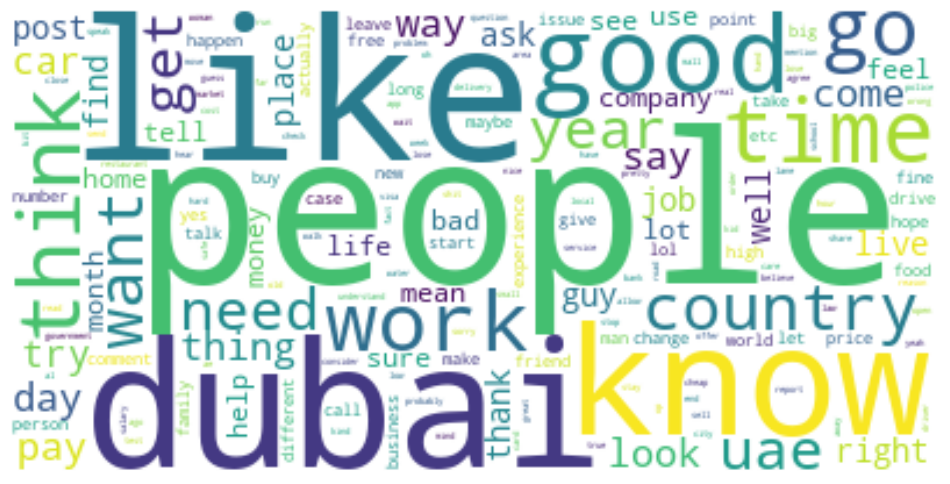

In [117]:
#visualize most common words in a wordcloud

# Calculate the TF-IDF scores for each word
word_scores = zip(bow_features, X_bow_0.sum(axis = 0).A1)

# Create a dictionary with word scores
word_scores_dict = dict(word_scores)

# Create an instance of WordCloud with the TF-IDF scores as input
wordcloud = WordCloud(background_color="white").generate_from_frequencies(word_scores_dict)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()